This code plots Figure 5C

In [13]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
adata = sc.read('adata_gata_for_dea.h5')

In [3]:
# Differentially expressed genes in Ery1 population

In [4]:
adata_rid = adata[adata.obs.pop_haem_ref== 'Ery1',:].copy()

In [5]:
sc.tl.rank_genes_groups(adata_rid, 'tomato', groxsups=['pos','neg'], method='wilcoxon', n_genes=10000)

In [6]:
df1 = pd.DataFrame(adata_rid.uns['rank_genes_groups']['names'])
df2 = pd.DataFrame(adata_rid.uns['rank_genes_groups']['pvals_adj'])
df3 = pd.DataFrame(adata_rid.uns['rank_genes_groups']['logfoldchanges'])

# fold change treshold 2 and fdr 0.1
vec_up = np.where((df3['pos'] >= np.log2(2)) & (df2['pos'] <= 0.1) )[0]
vec_down = np.where((df3['neg'] >= np.log2(2)) & (df2['neg'] <= 0.1) )[0]
    
df_pos = pd.DataFrame(df2.loc[vec_up]['pos'])
df_pos.index = list(df1.loc[vec_up]['pos'])
df_pos['lfc'] = list(df3.loc[vec_up]['pos'])
df_pos = df_pos.sort_values(by='lfc',ascending=False)

df_neg = pd.DataFrame(df2.loc[vec_down]['neg'])
df_neg.index = list(df1.loc[vec_down]['neg'])
df_neg['lfc'] = list(df3.loc[vec_down]['neg'])
df_neg = df_neg.sort_values(by='lfc',ascending=False)

In [7]:
list_n = df_neg.index # genes upregulated in Ery1 tom-, so downregulated in Ery1 tom+
list_p = df_pos.index # genes upregulated in Ery1 tom+

In [15]:
len(list_n)

295

In [ ]:
# Plot Figure 5C

In [16]:
list_MURK = list(pd.read_csv('/Users/mb2338/Desktop/carolina/github_18_feb/def_upload/files/murk_genes_mouse.csv',header=None).iloc[:,0])

In [17]:
intersection_down_ery1_tom_p_murk = [gene for gene in list_n if gene in list_MURK]

In [18]:
len(intersection_down_ery1_tom_p_murk)

43

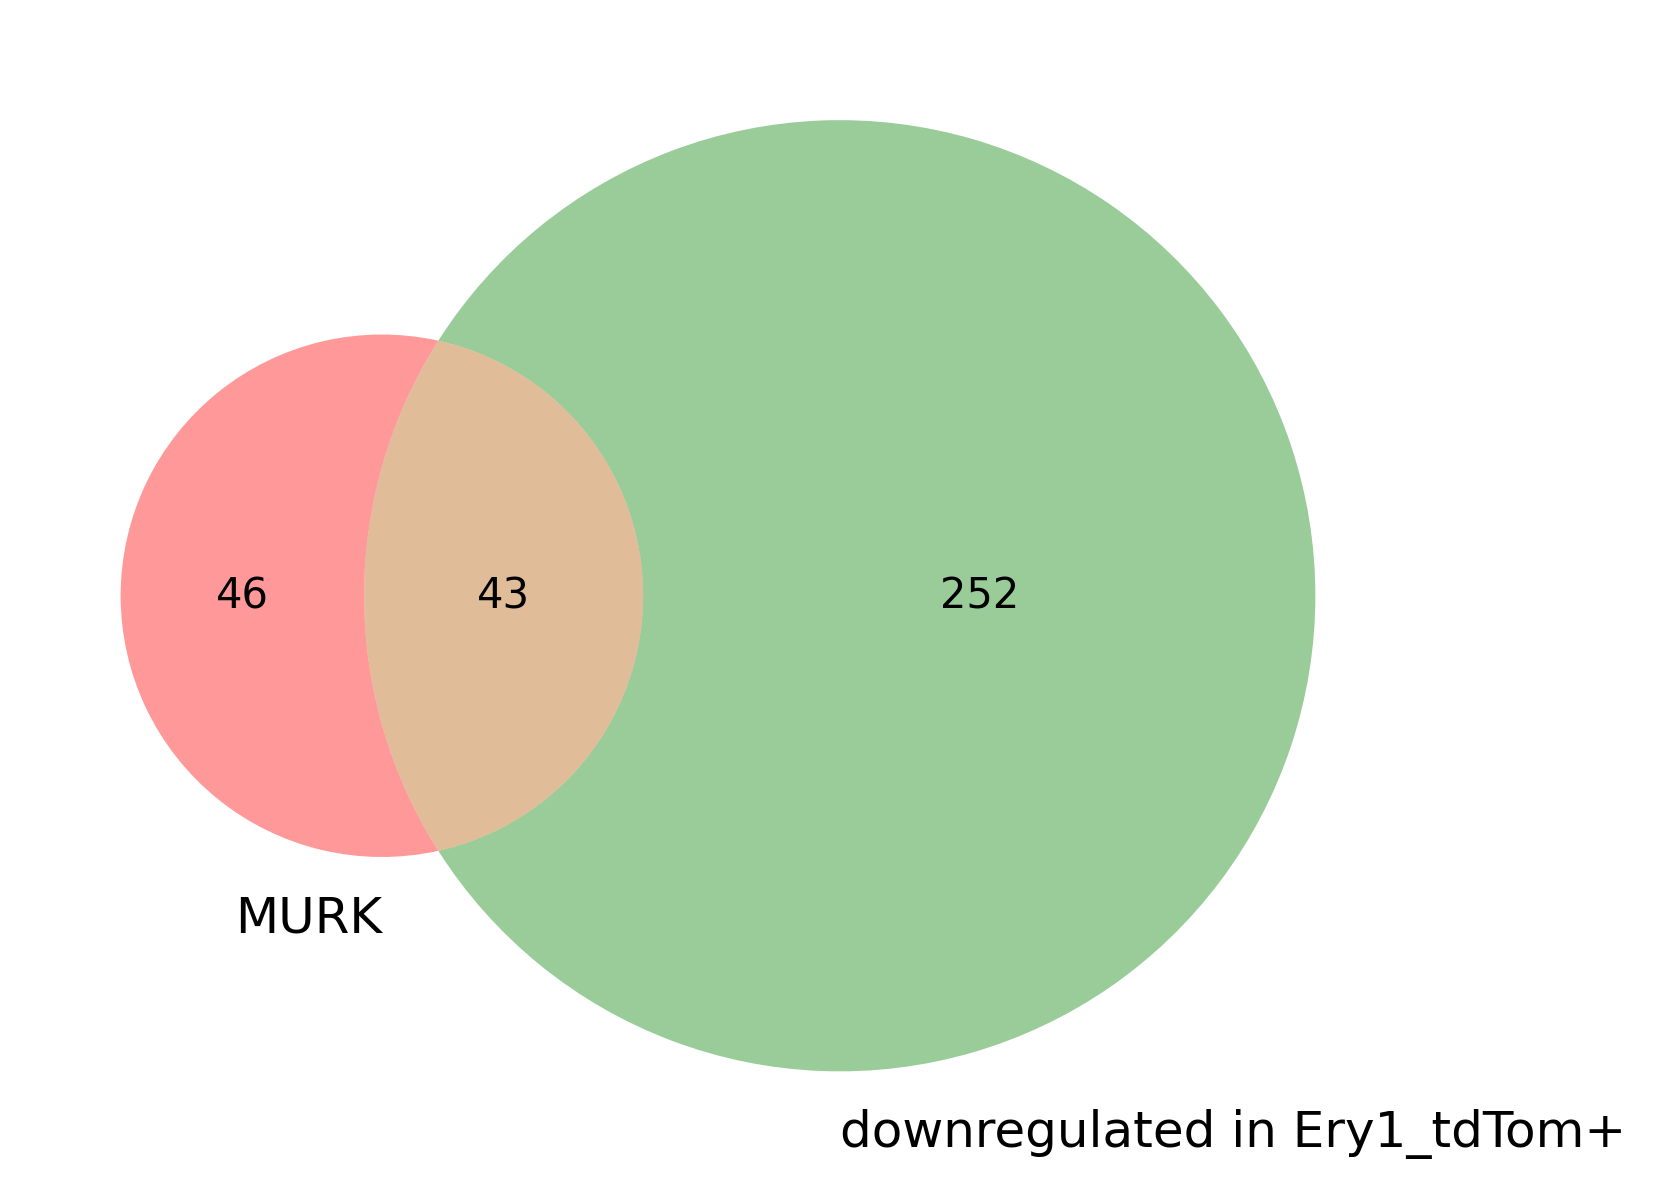

In [19]:
plt.figure(figsize=(10,5),dpi=300)
venn2(subsets = (89-43, 295-43, 43), set_labels = ('MURK', 'downregulated in Ery1_tdTom+'))#,set_colors=['#ff6500','#185f87']

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

plt.show()